In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('file_path', compression='gzip')
dfm = data.copy()
dfm.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


_________
## From Last part
We will drop all values that are not interesting for us and here we will be concentrated only on modelling part
_________

In [6]:
from sklearn.impute import SimpleImputer

imp_mort = SimpleImputer(missing_values=np.nan, strategy='mean')

trimmed_from_last_part=["addr_state","annual_inc","dti","fico_range_high","fico_range_low",
     "home_ownership","installment","int_rate","loan_status","mort_acc",
     "open_acc","purpose","revol_util","sub_grade","term","total_acc"]
dfm = dfm[trimmed_from_last_part]
dfm['fico_range_avg'] = (dfm["fico_range_high"]+dfm["fico_range_low"])/2
dfm = dfm.drop(['fico_range_high', 'fico_range_low'], axis=1)

dfm["mort_acc"]=imp_mort.fit_transform(dfm[["mort_acc"]])

dfm = dfm.dropna()
dfm

,addr_state,annual_inc,dti,home_ownership,installment,int_rate,loan_status,mort_acc,open_acc,purpose,revol_util,sub_grade,term,total_acc,fico_range_avg
0,PA,55000.0,5.91,MORTGAGE,123.03,13.99,Fully Paid,1.0,7.0,debt_consolidation,29.7,C4,36 months,13.0,677.0
1,SD,65000.0,16.06,MORTGAGE,820.28,11.99,Fully Paid,4.0,22.0,small_business,19.2,C1,36 months,38.0,717.0
2,IL,63000.0,10.78,MORTGAGE,432.66,10.78,Fully Paid,5.0,6.0,home_improvement,56.2,B4,60 months,18.0,697.0
3,NJ,110000.0,17.06,MORTGAGE,829.90,14.85,Current,1.0,13.0,debt_consolidation,11.6,C5,60 months,17.0,787.0
4,PA,104433.0,25.37,MORTGAGE,289.91,22.45,Fully Paid,6.0,12.0,major_purchase,64.5,F1,60 months,35.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,AL,95000.0,19.61,MORTGAGE,543.50,12.79,Current,0.0,5.0,home_improvement,84.4,C1,60 months,54.0,667.0
2260695,UT,108000.0,34.94,MORTGAGE,515.74,10.49,Current,4.0,24.0,debt_consolidation,39.0,B3,60 months,58.0,697.0
2260696,CA,227000.0,12.75,MORTGAGE,859.56,10.49,Current,3.0,5.0,debt_consolidation,64.9,B3,60 months,37.0,707.0
2260697,FL,110000.0,18.30,RENT,564.56,14.49,Charged Off,2.0,10.0,debt_consolidation,68.1,C4,60 months,31.0,662.0


In [7]:
target_loan = ["Fully Paid","Charged Off"]
dfm = dfm[dfm["loan_status"].isin(target_loan)]
dfm = dfm.replace(['Fully Paid', 'Charged Off'], [1, 0])
dfm

,addr_state,annual_inc,dti,home_ownership,installment,int_rate,loan_status,mort_acc,open_acc,purpose,revol_util,sub_grade,term,total_acc,fico_range_avg
0,PA,55000.0,5.91,MORTGAGE,123.03,13.99,1,1.0,7.0,debt_consolidation,29.7,C4,36 months,13.0,677.0
1,SD,65000.0,16.06,MORTGAGE,820.28,11.99,1,4.0,22.0,small_business,19.2,C1,36 months,38.0,717.0
2,IL,63000.0,10.78,MORTGAGE,432.66,10.78,1,5.0,6.0,home_improvement,56.2,B4,60 months,18.0,697.0
4,PA,104433.0,25.37,MORTGAGE,289.91,22.45,1,6.0,12.0,major_purchase,64.5,F1,60 months,35.0,697.0
5,GA,34000.0,10.20,RENT,405.18,13.44,1,0.0,5.0,debt_consolidation,68.4,C3,36 months,6.0,692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,TX,130000.0,20.59,OWN,377.95,9.49,1,3.0,17.0,home_improvement,34.0,B2,60 months,39.0,737.0
2260690,CA,180792.0,22.03,MORTGAGE,683.94,13.99,1,3.0,16.0,debt_consolidation,85.2,C3,60 months,32.0,707.0
2260691,AZ,157000.0,10.34,MORTGAGE,752.74,14.49,0,3.0,14.0,home_improvement,27.4,C4,60 months,18.0,737.0
2260692,NC,150000.0,12.25,RENT,362.34,12.79,1,0.0,12.0,medical,55.0,C1,60 months,28.0,667.0


In [8]:
y = dfm["loan_status"]
X = dfm.drop(['loan_status'],axis=1)

OneHotted = pd.get_dummies(X[['addr_state',  'home_ownership', 'purpose', 'sub_grade','term']], drop_first=True)
X=X.drop(['addr_state', 'home_ownership', 'purpose', 'sub_grade','term'],axis=1)

X = pd.concat([X,OneHotted],axis=1)
X.columns

Index(['annual_inc', 'dti', 'installment', 'int_rate', 'mort_acc', 'open_acc',
       'revol_util', 'total_acc', 'fico_range_avg', 'addr_state_AL',
       ...
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'term_ 60 months'],
      dtype='object', length=112)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=33)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(1075264, 112)

In [10]:
print((dfm.isna().sum()/dfm.shape[0]).sort_values())
#As bonus, we managed to save 500 rows as a bonus :)

addr_state        0.0
annual_inc        0.0
dti               0.0
home_ownership    0.0
installment       0.0
int_rate          0.0
loan_status       0.0
mort_acc          0.0
open_acc          0.0
purpose           0.0
revol_util        0.0
sub_grade         0.0
term              0.0
total_acc         0.0
fico_range_avg    0.0
dtype: float64


----------
## Modelling
----------

In [11]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

def model_evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    fp = len(y_test[y_test == 0])
    co = len(y_test[y_test == 1])
    print('______________________________________________________________________')
    print(f'Test set total client number: {len(y_test)}')
    print(f'Charged Off: {fp}, predicted: {confusion_matrix(y_test, y_pred)[0][0]} true charged off loaners and {confusion_matrix(y_test, y_pred)[0][1]} false charged off loaners')
    print(f'Fully Paid: {co}, predicted: {confusion_matrix(y_test, y_pred)[1][0]} false payers and {confusion_matrix(y_test, y_pred)[1][1]} true payers')
    #print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

--------------
### Dummy Classifier
------------

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

model_dc = DummyClassifier(random_state = 0)
model_dc.fit(X_train,y_train)
score_dc = model_dc.score(X_test, y_test)

In [13]:
preds = model_dc.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     53627
           1       0.80      1.00      0.89    215189

    accuracy                           0.80    268816
   macro avg       0.40      0.50      0.44    268816
weighted avg       0.64      0.80      0.71    268816



<AxesSubplot:>

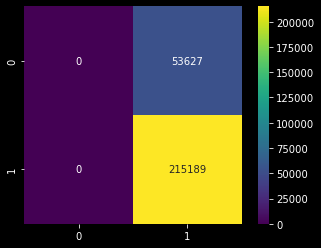

In [14]:
cm_dc = confusion_matrix(y_test,preds)
sns.heatmap(cm_dc, annot=True, fmt='d', cmap='viridis', square=True)
#As we predicted, an imbalanced data gives a high accuracy even with worst case classifiers, that's why we must look
#for precision and recall scores. In our case, those are not valid

-------
### Sklearn models 
-----

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model_ada = AdaBoostClassifier(random_state=0)
model_rf = RandomForestClassifier(random_state=0)
model_svm = SVC(random_state=0)
model_knn = KNeighborsClassifier(n_neighbors=4)
model_list = [model_ada, model_rf, model_svm, model_knn]

#N.B. we could eventually make individual pipelines for each model, but as we have ANN models to  train, we didn't do it  

In [ ]:
#for model in model_list:
#    model_evaluation(model)
    
#Takes much time to process and available RAM, but you can hence see the 1st 2 resuilts for RandomForestClassifier and AdaBoostClassifier
#We may also mostly work on KNN with more hyperparameters and GridSearchCV, in order to get best params and final estimator

______________________________________________________________________
Test set total client number: 268816
Charged Off: 53627, predicted: 3404 true charged off loaners and 50223 false charged off loaners
Fully Paid: 215189, predicted: 2809 false payers and 212380 true payers
              precision    recall  f1-score   support

           0       0.55      0.06      0.11     53627
           1       0.81      0.99      0.89    215189

    accuracy                           0.80    268816
   macro avg       0.68      0.53      0.50    268816
weighted avg       0.76      0.80      0.73    268816

______________________________________________________________________
Test set total client number: 268816
Charged Off: 53627, predicted: 4643 true charged off loaners and 48984 false charged off loaners
Fully Paid: 215189, predicted: 4089 false payers and 211100 true payers
              precision    recall  f1-score   support

           0       0.53      0.09      0.15     53627
          

--------
### ANN model
--------

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

In [17]:
#Choose a GPU accelerator to run the NNwith higher speed
input_shape = len(X.columns)

model_nn =  keras.Sequential([layers.Dense(256, activation='relu', input_shape=[input_shape]),
                              layers.Dropout(0.2),
                              layers.Dense(256, activation='relu'),
                              layers.Dropout(0.2),
                              layers.Dense(256, activation='relu'),
                              layers.Dropout(0.2),
                              layers.Dense(256, activation='relu'),
                              layers.Dropout(0.2),
                              layers.Dense(1, activation='sigmoid')])
model_nn.summary()

2023-01-28 18:06:17.777501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:06:17.861684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:06:17.862493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:06:17.864425: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               28928     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6

node zero
2023-01-28 18:06:17.865435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:06:17.866108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:06:19.739010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:06:19.739864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-28 18:06:19.740614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

In [18]:
model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

In [21]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model_nn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=300,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1
)

2023-01-28 18:08:33.092418: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 481718272 exceeds 10% of free system memory.
2023-01-28 18:08:33.832065: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 481718272 exceeds 10% of free system memory.


Epoch 1/1000
3576/3585 [============================>.] - ETA: 0s - loss: 0.4558 - binary_accuracy: 0.8013

2023-01-28 18:08:46.018429: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 120429568 exceeds 10% of free system memory.


3585/3585 [==============================] - 13s 4ms/step - loss: 0.4558 - binary_accuracy: 0.8013 - val_loss: 0.4552 - val_binary_accuracy: 0.8009
Epoch 2/1000
3585/3585 [==============================] - 13s 3ms/step - loss: 0.4550 - binary_accuracy: 0.8017 - val_loss: 0.4552 - val_binary_accuracy: 0.8008
Epoch 3/1000
3585/3585 [==============================] - 13s 4ms/step - loss: 0.4544 - binary_accuracy: 0.8016 - val_loss: 0.4550 - val_binary_accuracy: 0.8015
Epoch 4/1000
3585/3585 [==============================] - 14s 4ms/step - loss: 0.4540 - binary_accuracy: 0.8019 - val_loss: 0.4545 - val_binary_accuracy: 0.8029
Epoch 5/1000
3585/3585 [==============================] - 13s 4ms/step - loss: 0.4535 - binary_accuracy: 0.8023 - val_loss: 0.4545 - val_binary_accuracy: 0.8019
Epoch 6/1000
3585/3585 [==============================] - 13s 3ms/step - loss: 0.4532 - binary_accuracy: 0.8021 - val_loss: 0.4554 - val_binary_accuracy: 0.8012


In [22]:
history.history

{'loss': [0.4557555913925171,
  0.4549867510795593,
  0.4544028639793396,
  0.4540237784385681,
  0.45353981852531433,
  0.453159362077713],
 'binary_accuracy': [0.8013418316841125,
  0.8016775250434875,
  0.8016356825828552,
  0.8019100427627563,
  0.8022578358650208,
  0.8021351099014282],
 'val_loss': [0.4552258551120758,
  0.4551946222782135,
  0.4549780786037445,
  0.4544871747493744,
  0.4545084238052368,
  0.45536816120147705],
 'val_binary_accuracy': [0.80086749792099,
  0.8008414506912231,
  0.8015148043632507,
  0.8029283881187439,
  0.8019165396690369,
  0.8011502027511597]}

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

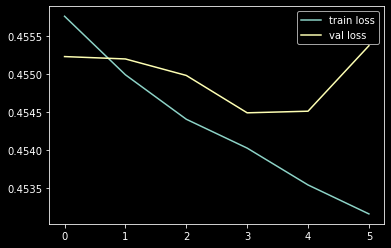

In [25]:
history_dict = history.history
plt.plot(history_dict['loss'], label='train loss')
plt.plot(history_dict['val_loss'], label='val loss')
plt.legend()
plt.label()

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

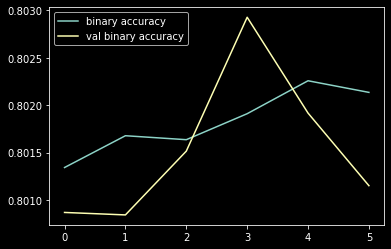

In [26]:
plt.plot(history_dict['binary_accuracy'], label='binary accuracy')
plt.plot(history_dict['val_binary_accuracy'], label='val binary accuracy')
plt.legend()
plt.label()

In [33]:
print('Min Val Loss:', min(history_dict['val_loss']))
print('Max Val Accuracy:', max(history_dict['val_binary_accuracy'])) 

Min Val Loss: 0.4544871747493744
Max Val Accuracy: 0.8029283881187439


              precision    recall  f1-score   support

           0       0.60      0.01      0.01     53627
           1       0.80      1.00      0.89    215189

    accuracy                           0.80    268816
   macro avg       0.70      0.50      0.45    268816
weighted avg       0.76      0.80      0.71    268816



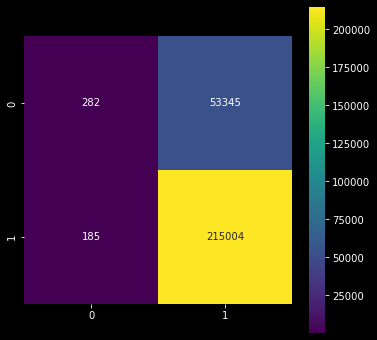

In [35]:
predictions_50 = (model_nn.predict(X_test) > 0.5).astype("int32") #for threshold 50%
cm = confusion_matrix(y_test,predictions_50)
fig, ax =plt.subplots(figsize=(7,7))
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True) 

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.01      0.01     53627
           1       0.80      1.00      0.89    215189

    accuracy                           0.80    268816
   macro avg       0.70      0.50      0.45    268816
weighted avg       0.76      0.80      0.71    268816



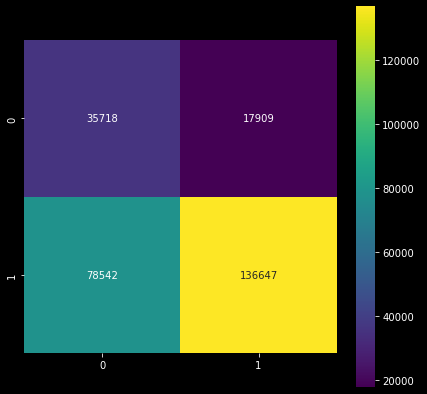

In [38]:
predictions_70 = (model_nn.predict(X_test) > 0.8).astype("int32") #for threshold 80%
cm = confusion_matrix(y_test,predictions_70)
fig, ax =plt.subplots(figsize=(7,7))
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True) 

print(classification_report(y_test,predictions))

______________
## Conclusion
______________
It could be possible to us, as you may observe in comments of every case, to ameliorate the models, because even a model with deep learning approach, regardless better precision/accuracy/recall, is flawed
(See notes and tipps in sklearn modelling cells)